<a id="title_ID"></a>
# JWST Pipeline Validation Notebook: calwebb_image3 with MIRI

<span style="color:red"> **Instruments Affected**</span>: MIRI, NIRCam 

## Summary

This notebook processes level 2 images through the calwebb_image3 pipeline.

1) Read in images.

2) Set up association file.

3) Run image3 pipeline with association file as input.

4) Display and examine combined image.


The pipeline documentation can be found here: https://jwst-pipeline.readthedocs.io/en/latest/

The pipeline code is available on GitHub: https://github.com/spacetelescope/jwst

Author: T. Temim

In [1]:
# Create a temporary directory to hold notebook output, and change the working directory to that directory.
from tempfile import TemporaryDirectory
import os
data_dir = TemporaryDirectory()
os.chdir(data_dir.name)
print(data_dir)

<TemporaryDirectory '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww'>


### Set up import statements

In [2]:
import pytest
from astropy.io import fits
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import jwst
import json
#from jwst.pipeline import Image2Pipeline
#from jwst.pipeline import Image3Pipeline
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base
from jwst.datamodels import ImageModel
from jwst.pipeline import calwebb_image3
from jwst.pipeline import calwebb_image2
from jwst.pipeline import calwebb_detector1
from jwst.pipeline import Image3Pipeline
from jwst.associations import asn_from_list
from jwst import datamodels
from matplotlib import rcParams
from ci_watson.artifactory_helpers import get_bigdata

2021-05-17 22:04:28,657 - stpipe - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/photutils/detection/findstars.py:33: AstropyDeprecationWarning: _StarFinderKernel was moved to the photutils.detection._utils module. Please update your import statement.
  warnings.warn(f'{name} was moved to the {deprecated[name]} module. '



In [3]:
import os
os.environ['CRDS_CONTEXT']='jwst_0619.pmap'
os.environ['CRDS_PATH'] = os.getcwd()

### Print pipeline version number

In [4]:
jwst.__version__ 

'1.1.0'

### Set up data path and image list file

In [5]:
print("Downloading input file 1")
input_file1 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'image3',
                     'image3_miri_test', 
                     'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal.fits')
print("Downloading input file 2")
input_file2 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'image3',
                     'image3_miri_test', 
                     'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__cal.fits')
print("Downloading input file 3")
input_file3 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'image3',
                     'image3_miri_test', 
                     'starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__cal.fits')
print("Downloading input file 4")
input_file4 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'image3',
                     'image3_miri_test', 
                     'starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__cal.fits')
print("Downloading input file 5")
input_file5 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'image3',
                     'image3_miri_test', 
                     'starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal.fits')
print("Downloading input file 6")
input_file6 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'image3',
                     'image3_miri_test', 
                     'starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal.fits')
print("Downloading input file 7")
input_file7 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'image3',
                     'image3_miri_test', 
                     'starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal.fits')
print("Downloading input file 8")
input_file8 = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'image3',
                     'image3_miri_test', 
                     'starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal.fits')
print("Finished Downloads")
input_files=[input_file1,input_file2,input_file3,input_file4,input_file5,input_file6,input_file7,input_file8]

Finished Downloads


### Set up association files

In [6]:
# use asn_from_list to create association table
cal_list=input_files
asn = asn_from_list.asn_from_list(cal_list, rule=DMS_Level3_Base, product_name='image3_combined.fits')

# use this if you need to add non'science' exposure types
#asn['products'][0]['members'][1]['exptype'] = 'background'
#asn['products'][0]['members'][2]['exptype'] = 'sourcecat'

# dump association table to a .json file for use in image3
with open('image3_asnfile.json', 'w') as fp:
    fp.write(asn.dump()[1])

image3_json_file='image3_asnfile.json'
    
json_file = image3_json_file
file_list = []
file_list2 = []
with open(json_file) as json_data:
    d = json.load(json_data)
    members = d['products'][0]['members']
    for item in np.arange(0,len(members)):
        file_list.append(members[item]['expname'])
        file_list2.append(members[item]['expname'][:-5]+"_image3.fits")

### Run input data through image3 pipeline

In [7]:
# Put in parameters needed to give better source finding results

snr= 250 # signal to noise threshold, default=5
sigma= 3 # clipping limit, in sigma units, used when performing fit, default=3

# Run pipeline
im3 = calwebb_image3.Image3Pipeline()
im3.tweakreg.snr_threshold = snr
im3.tweakreg.sigma = sigma
im3.source_catalog.snr_threshold = snr
im3.save_results = True
im3.run('image3_asnfile.json')

2021-05-17 22:04:33,478 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.


2021-05-17 22:04:33,480 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.


2021-05-17 22:04:33,482 - stpipe.Image3Pipeline.tweakreg - INFO - TweakRegStep instance created.


2021-05-17 22:04:33,488 - stpipe.Image3Pipeline.skymatch - INFO - SkyMatchStep instance created.


2021-05-17 22:04:33,490 - stpipe.Image3Pipeline.outlier_detection - INFO - OutlierDetectionStep instance created.


2021-05-17 22:04:33,492 - stpipe.Image3Pipeline.resample - INFO - ResampleStep instance created.


2021-05-17 22:04:33,493 - stpipe.Image3Pipeline.source_catalog - INFO - SourceCatalogStep instance created.


2021-05-17 22:04:33,654 - stpipe.Image3Pipeline - INFO - Step Image3Pipeline running with args ('image3_asnfile.json',).


2021-05-17 22:04:33,660 - stpipe.Image3Pipeline - INFO - Step Image3Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'steps': {'assign_mtwcs': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_mtwcs', 'search_output_file': True, 'input_dir': ''}, 'tweakreg': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 250, 'brightest':

2021-05-17 22:04:34,361 - stpipe.Image3Pipeline - INFO - Prefetching reference files for dataset: 'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal.fits' reftypes = ['abvegaoffset', 'apcorr', 'drizpars']


2021-05-17 22:04:34,574 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_system_datalvl_0002.rmap      694 bytes  (1 / 135 files) (0 / 335.8 K bytes)


2021-05-17 22:04:34,629 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_system_calver_0022.rmap    2.4 K bytes  (2 / 135 files) (694 / 335.8 K bytes)


2021-05-17 22:04:34,675 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_system_0021.imap      385 bytes  (3 / 135 files) (3.1 K / 335.8 K bytes)


2021-05-17 22:04:34,718 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_wavelengthrange_0016.rmap    1.1 K bytes  (4 / 135 files) (3.5 K / 335.8 K bytes)


2021-05-17 22:04:34,765 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_wavecorr_0003.rmap      833 bytes  (5 / 135 files) (4.6 K / 335.8 K bytes)


2021-05-17 22:04:34,810 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_superbias_0038.rmap   15.8 K bytes  (6 / 135 files) (5.5 K / 335.8 K bytes)


2021-05-17 22:04:34,857 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_sflat_0009.rmap    8.5 K bytes  (7 / 135 files) (21.2 K / 335.8 K bytes)


2021-05-17 22:04:34,904 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_saturation_0017.rmap    2.0 K bytes  (8 / 135 files) (29.7 K / 335.8 K bytes)


2021-05-17 22:04:34,949 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_refpix_0014.rmap    1.5 K bytes  (9 / 135 files) (31.7 K / 335.8 K bytes)


2021-05-17 22:04:34,992 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_readnoise_0015.rmap    1.8 K bytes  (10 / 135 files) (33.2 K / 335.8 K bytes)


2021-05-17 22:04:35,039 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_photom_0012.rmap      907 bytes  (11 / 135 files) (35.0 K / 335.8 K bytes)


2021-05-17 22:04:35,082 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_pathloss_0003.rmap      932 bytes  (12 / 135 files) (36.0 K / 335.8 K bytes)


2021-05-17 22:04:35,126 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_ote_0019.rmap    1.0 K bytes  (13 / 135 files) (36.9 K / 335.8 K bytes)


2021-05-17 22:04:35,170 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_msaoper_0003.rmap      783 bytes  (14 / 135 files) (37.9 K / 335.8 K bytes)


2021-05-17 22:04:35,210 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_msa_0017.rmap    1.0 K bytes  (15 / 135 files) (38.7 K / 335.8 K bytes)


2021-05-17 22:04:35,253 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_mask_0021.rmap    1.5 K bytes  (16 / 135 files) (39.7 K / 335.8 K bytes)


2021-05-17 22:04:35,294 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_linearity_0017.rmap    1.6 K bytes  (17 / 135 files) (41.2 K / 335.8 K bytes)


2021-05-17 22:04:35,335 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_ipc_0006.rmap      876 bytes  (18 / 135 files) (42.8 K / 335.8 K bytes)


2021-05-17 22:04:35,385 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_ifuslicer_0007.rmap      733 bytes  (19 / 135 files) (43.6 K / 335.8 K bytes)


2021-05-17 22:04:35,429 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_ifupost_0009.rmap      719 bytes  (20 / 135 files) (44.4 K / 335.8 K bytes)


2021-05-17 22:04:35,473 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_ifufore_0007.rmap      719 bytes  (21 / 135 files) (45.1 K / 335.8 K bytes)


2021-05-17 22:04:35,517 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_gain_0019.rmap    1.8 K bytes  (22 / 135 files) (45.8 K / 335.8 K bytes)


2021-05-17 22:04:35,560 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_fpa_0017.rmap    1.0 K bytes  (23 / 135 files) (47.6 K / 335.8 K bytes)


2021-05-17 22:04:35,602 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_fore_0016.rmap    3.4 K bytes  (24 / 135 files) (48.6 K / 335.8 K bytes)


2021-05-17 22:04:35,650 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_flat_0012.rmap    3.6 K bytes  (25 / 135 files) (52.0 K / 335.8 K bytes)


2021-05-17 22:04:35,695 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_fflat_0007.rmap    3.3 K bytes  (26 / 135 files) (55.6 K / 335.8 K bytes)


2021-05-17 22:04:35,740 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_extract1d_0010.rmap    1.2 K bytes  (27 / 135 files) (58.9 K / 335.8 K bytes)


2021-05-17 22:04:35,784 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_disperser_0018.rmap    3.9 K bytes  (28 / 135 files) (60.1 K / 335.8 K bytes)


2021-05-17 22:04:35,828 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_dflat_0004.rmap    1.0 K bytes  (29 / 135 files) (64.0 K / 335.8 K bytes)


2021-05-17 22:04:35,871 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_dark_0031.rmap   14.4 K bytes  (30 / 135 files) (65.0 K / 335.8 K bytes)


2021-05-17 22:04:35,919 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_cubepar_0005.rmap      740 bytes  (31 / 135 files) (79.4 K / 335.8 K bytes)


2021-05-17 22:04:35,964 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_collimator_0016.rmap    1.1 K bytes  (32 / 135 files) (80.1 K / 335.8 K bytes)


2021-05-17 22:04:36,006 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_camera_0016.rmap    1.0 K bytes  (33 / 135 files) (81.2 K / 335.8 K bytes)


2021-05-17 22:04:36,050 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_barshadow_0003.rmap      877 bytes  (34 / 135 files) (82.3 K / 335.8 K bytes)


2021-05-17 22:04:36,095 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_area_0013.rmap    4.5 K bytes  (35 / 135 files) (83.1 K / 335.8 K bytes)


2021-05-17 22:04:36,139 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_apcorr_0002.rmap    4.2 K bytes  (36 / 135 files) (87.6 K / 335.8 K bytes)


2021-05-17 22:04:36,179 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nirspec_0201.imap    2.4 K bytes  (37 / 135 files) (91.8 K / 335.8 K bytes)


2021-05-17 22:04:36,218 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_wfssbkg_0002.rmap    2.3 K bytes  (38 / 135 files) (94.1 K / 335.8 K bytes)


2021-05-17 22:04:36,264 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_wavelengthrange_0005.rmap      811 bytes  (39 / 135 files) (96.4 K / 335.8 K bytes)


2021-05-17 22:04:36,309 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_trappars_0004.rmap      753 bytes  (40 / 135 files) (97.2 K / 335.8 K bytes)


2021-05-17 22:04:36,351 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_trapdensity_0004.rmap      774 bytes  (41 / 135 files) (98.0 K / 335.8 K bytes)


2021-05-17 22:04:36,389 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_throughput_0004.rmap      979 bytes  (42 / 135 files) (98.7 K / 335.8 K bytes)


2021-05-17 22:04:36,439 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_superbias_0022.rmap    4.6 K bytes  (43 / 135 files) (99.7 K / 335.8 K bytes)


2021-05-17 22:04:36,484 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_specwcs_0005.rmap    2.3 K bytes  (44 / 135 files) (104.3 K / 335.8 K bytes)


2021-05-17 22:04:36,531 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_saturation_0010.rmap      625 bytes  (45 / 135 files) (106.6 K / 335.8 K bytes)


2021-05-17 22:04:36,575 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_readnoise_0008.rmap      969 bytes  (46 / 135 files) (107.2 K / 335.8 K bytes)


2021-05-17 22:04:36,622 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_photom_0026.rmap      996 bytes  (47 / 135 files) (108.2 K / 335.8 K bytes)


2021-05-17 22:04:36,666 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_persat_0005.rmap      738 bytes  (48 / 135 files) (109.2 K / 335.8 K bytes)


2021-05-17 22:04:36,711 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_pathloss_0002.rmap      707 bytes  (49 / 135 files) (109.9 K / 335.8 K bytes)


2021-05-17 22:04:36,753 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_mask_0016.rmap      735 bytes  (50 / 135 files) (110.6 K / 335.8 K bytes)


2021-05-17 22:04:36,799 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_linearity_0015.rmap      760 bytes  (51 / 135 files) (111.4 K / 335.8 K bytes)


2021-05-17 22:04:36,840 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_ipc_0006.rmap      590 bytes  (52 / 135 files) (112.1 K / 335.8 K bytes)


2021-05-17 22:04:36,885 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_gain_0009.rmap      838 bytes  (53 / 135 files) (112.7 K / 335.8 K bytes)


2021-05-17 22:04:36,934 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_flat_0016.rmap    4.1 K bytes  (54 / 135 files) (113.6 K / 335.8 K bytes)


2021-05-17 22:04:36,982 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_extract1d_0006.rmap      854 bytes  (55 / 135 files) (117.7 K / 335.8 K bytes)


2021-05-17 22:04:37,026 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_drizpars_0004.rmap      519 bytes  (56 / 135 files) (118.5 K / 335.8 K bytes)


2021-05-17 22:04:37,070 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_distortion_0017.rmap      899 bytes  (57 / 135 files) (119.1 K / 335.8 K bytes)


2021-05-17 22:04:37,114 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_dark_0027.rmap    4.0 K bytes  (58 / 135 files) (120.0 K / 335.8 K bytes)


2021-05-17 22:04:37,163 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_area_0012.rmap    1.1 K bytes  (59 / 135 files) (123.9 K / 335.8 K bytes)


2021-05-17 22:04:37,204 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_apcorr_0003.rmap    4.1 K bytes  (60 / 135 files) (125.0 K / 335.8 K bytes)


2021-05-17 22:04:37,249 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_abvegaoffset_0002.rmap    1.3 K bytes  (61 / 135 files) (129.2 K / 335.8 K bytes)


2021-05-17 22:04:37,290 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_niriss_0128.imap    2.2 K bytes  (62 / 135 files) (130.4 K / 335.8 K bytes)


2021-05-17 22:04:37,332 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_wfssbkg_0003.rmap    7.2 K bytes  (63 / 135 files) (132.6 K / 335.8 K bytes)


2021-05-17 22:04:37,373 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_wavelengthrange_0009.rmap      945 bytes  (64 / 135 files) (139.7 K / 335.8 K bytes)


2021-05-17 22:04:37,413 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_tsophot_0002.rmap      794 bytes  (65 / 135 files) (140.7 K / 335.8 K bytes)


2021-05-17 22:04:37,458 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_trappars_0003.rmap    1.6 K bytes  (66 / 135 files) (141.5 K / 335.8 K bytes)


2021-05-17 22:04:37,505 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_trapdensity_0003.rmap    1.6 K bytes  (67 / 135 files) (143.1 K / 335.8 K bytes)


2021-05-17 22:04:37,549 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_superbias_0006.rmap    2.6 K bytes  (68 / 135 files) (144.7 K / 335.8 K bytes)


2021-05-17 22:04:37,596 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_specwcs_0008.rmap    1.7 K bytes  (69 / 135 files) (147.3 K / 335.8 K bytes)


2021-05-17 22:04:37,641 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_saturation_0006.rmap    2.2 K bytes  (70 / 135 files) (149.0 K / 335.8 K bytes)


2021-05-17 22:04:37,692 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_readnoise_0006.rmap    5.6 K bytes  (71 / 135 files) (151.1 K / 335.8 K bytes)


2021-05-17 22:04:37,742 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_psfmask_0005.rmap   10.7 K bytes  (72 / 135 files) (156.7 K / 335.8 K bytes)


2021-05-17 22:04:37,782 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_photom_0010.rmap    4.3 K bytes  (73 / 135 files) (167.4 K / 335.8 K bytes)


2021-05-17 22:04:37,826 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_persat_0004.rmap    1.6 K bytes  (74 / 135 files) (171.8 K / 335.8 K bytes)


2021-05-17 22:04:37,869 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_mask_0007.rmap    2.3 K bytes  (75 / 135 files) (173.3 K / 335.8 K bytes)


2021-05-17 22:04:37,912 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_linearity_0011.rmap    2.4 K bytes  (76 / 135 files) (175.6 K / 335.8 K bytes)


2021-05-17 22:04:37,964 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_ipc_0003.rmap    2.0 K bytes  (77 / 135 files) (178.0 K / 335.8 K bytes)


2021-05-17 22:04:38,015 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_gain_0009.rmap    2.9 K bytes  (78 / 135 files) (180.0 K / 335.8 K bytes)


2021-05-17 22:04:38,057 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_flat_0014.rmap   21.5 K bytes  (79 / 135 files) (182.9 K / 335.8 K bytes)


2021-05-17 22:04:38,098 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_filteroffset_0003.rmap    1.1 K bytes  (80 / 135 files) (204.4 K / 335.8 K bytes)


2021-05-17 22:04:38,139 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_drizpars_0001.rmap      519 bytes  (81 / 135 files) (205.5 K / 335.8 K bytes)


2021-05-17 22:04:38,182 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_distortion_0022.rmap    9.1 K bytes  (82 / 135 files) (206.1 K / 335.8 K bytes)


2021-05-17 22:04:38,229 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_dark_0018.rmap   14.1 K bytes  (83 / 135 files) (215.2 K / 335.8 K bytes)


2021-05-17 22:04:38,270 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_area_0006.rmap    4.6 K bytes  (84 / 135 files) (229.3 K / 335.8 K bytes)


2021-05-17 22:04:38,314 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_apcorr_0003.rmap    4.2 K bytes  (85 / 135 files) (233.9 K / 335.8 K bytes)


2021-05-17 22:04:38,354 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_abvegaoffset_0002.rmap    1.3 K bytes  (86 / 135 files) (238.1 K / 335.8 K bytes)


2021-05-17 22:04:38,398 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_nircam_0138.imap    2.2 K bytes  (87 / 135 files) (239.3 K / 335.8 K bytes)


2021-05-17 22:04:38,441 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_wcsregions_0009.rmap    1.1 K bytes  (88 / 135 files) (241.5 K / 335.8 K bytes)


2021-05-17 22:04:38,485 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_wavelengthrange_0019.rmap    1.1 K bytes  (89 / 135 files) (242.6 K / 335.8 K bytes)


2021-05-17 22:04:38,529 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_tsophot_0002.rmap      780 bytes  (90 / 135 files) (243.7 K / 335.8 K bytes)


2021-05-17 22:04:38,571 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_straymask_0007.rmap      885 bytes  (91 / 135 files) (244.5 K / 335.8 K bytes)


2021-05-17 22:04:38,613 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_specwcs_0025.rmap    2.3 K bytes  (92 / 135 files) (245.3 K / 335.8 K bytes)


2021-05-17 22:04:38,662 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_saturation_0011.rmap      961 bytes  (93 / 135 files) (247.6 K / 335.8 K bytes)


2021-05-17 22:04:38,707 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_rscd_0006.rmap      860 bytes  (94 / 135 files) (248.6 K / 335.8 K bytes)


2021-05-17 22:04:38,752 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_resol_0004.rmap      739 bytes  (95 / 135 files) (249.4 K / 335.8 K bytes)


2021-05-17 22:04:38,794 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_reset_0010.rmap    2.1 K bytes  (96 / 135 files) (250.2 K / 335.8 K bytes)


2021-05-17 22:04:38,836 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_regions_0025.rmap    2.0 K bytes  (97 / 135 files) (252.3 K / 335.8 K bytes)


2021-05-17 22:04:38,877 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_readnoise_0014.rmap    4.3 K bytes  (98 / 135 files) (254.3 K / 335.8 K bytes)


2021-05-17 22:04:38,924 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_psfmask_0003.rmap    1.3 K bytes  (99 / 135 files) (258.6 K / 335.8 K bytes)


2021-05-17 22:04:38,970 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_photom_0028.rmap    5.5 K bytes  (100 / 135 files) (259.8 K / 335.8 K bytes)


2021-05-17 22:04:39,017 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_mask_0015.rmap      893 bytes  (101 / 135 files) (265.3 K / 335.8 K bytes)


2021-05-17 22:04:39,061 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_linearity_0013.rmap    1.9 K bytes  (102 / 135 files) (266.2 K / 335.8 K bytes)


2021-05-17 22:04:39,109 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_ipc_0005.rmap      721 bytes  (103 / 135 files) (268.2 K / 335.8 K bytes)


2021-05-17 22:04:39,154 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_gain_0007.rmap      893 bytes  (104 / 135 files) (268.9 K / 335.8 K bytes)


2021-05-17 22:04:39,198 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_fringe_0014.rmap    2.1 K bytes  (105 / 135 files) (269.8 K / 335.8 K bytes)


2021-05-17 22:04:39,244 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_flat_0046.rmap   19.1 K bytes  (106 / 135 files) (271.9 K / 335.8 K bytes)


2021-05-17 22:04:39,289 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_filteroffset_0020.rmap    1.1 K bytes  (107 / 135 files) (290.9 K / 335.8 K bytes)


2021-05-17 22:04:39,332 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_extract1d_0011.rmap    1.1 K bytes  (108 / 135 files) (292.1 K / 335.8 K bytes)


2021-05-17 22:04:39,380 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_drizpars_0002.rmap      511 bytes  (109 / 135 files) (293.1 K / 335.8 K bytes)


2021-05-17 22:04:39,425 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_distortion_0031.rmap    1.9 K bytes  (110 / 135 files) (293.7 K / 335.8 K bytes)


2021-05-17 22:04:39,471 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_dark_0020.rmap    3.5 K bytes  (111 / 135 files) (295.5 K / 335.8 K bytes)


2021-05-17 22:04:39,513 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_cubepar_0006.rmap      686 bytes  (112 / 135 files) (299.0 K / 335.8 K bytes)


2021-05-17 22:04:39,554 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_area_0011.rmap      755 bytes  (113 / 135 files) (299.7 K / 335.8 K bytes)


2021-05-17 22:04:39,600 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_apcorr_0004.rmap    4.3 K bytes  (114 / 135 files) (300.4 K / 335.8 K bytes)


2021-05-17 22:04:39,643 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_abvegaoffset_0002.rmap    1.3 K bytes  (115 / 135 files) (304.7 K / 335.8 K bytes)


2021-05-17 22:04:39,687 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_miri_0204.imap    2.2 K bytes  (116 / 135 files) (306.0 K / 335.8 K bytes)


2021-05-17 22:04:39,732 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_fgs_trappars_0004.rmap      903 bytes  (117 / 135 files) (308.2 K / 335.8 K bytes)


2021-05-17 22:04:39,771 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_fgs_trapdensity_0004.rmap      930 bytes  (118 / 135 files) (309.1 K / 335.8 K bytes)


2021-05-17 22:04:39,813 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_fgs_superbias_0015.rmap    3.8 K bytes  (119 / 135 files) (310.0 K / 335.8 K bytes)


2021-05-17 22:04:39,855 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_fgs_saturation_0009.rmap      779 bytes  (120 / 135 files) (313.8 K / 335.8 K bytes)


2021-05-17 22:04:39,900 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_fgs_readnoise_0011.rmap    1.3 K bytes  (121 / 135 files) (314.6 K / 335.8 K bytes)


2021-05-17 22:04:39,944 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_fgs_photom_0011.rmap    1.0 K bytes  (122 / 135 files) (315.9 K / 335.8 K bytes)


2021-05-17 22:04:39,991 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_fgs_persat_0004.rmap      884 bytes  (123 / 135 files) (316.9 K / 335.8 K bytes)


2021-05-17 22:04:40,034 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_fgs_mask_0018.rmap    1.2 K bytes  (124 / 135 files) (317.8 K / 335.8 K bytes)


2021-05-17 22:04:40,072 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_fgs_linearity_0013.rmap      925 bytes  (125 / 135 files) (319.0 K / 335.8 K bytes)


2021-05-17 22:04:40,113 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_fgs_ipc_0003.rmap      614 bytes  (126 / 135 files) (319.9 K / 335.8 K bytes)


2021-05-17 22:04:40,158 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_fgs_gain_0010.rmap      890 bytes  (127 / 135 files) (320.5 K / 335.8 K bytes)


2021-05-17 22:04:40,200 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_fgs_flat_0009.rmap    1.1 K bytes  (128 / 135 files) (321.4 K / 335.8 K bytes)


2021-05-17 22:04:40,239 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_fgs_distortion_0007.rmap    1.1 K bytes  (129 / 135 files) (322.5 K / 335.8 K bytes)


2021-05-17 22:04:40,281 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_fgs_dark_0011.rmap    3.3 K bytes  (130 / 135 files) (323.6 K / 335.8 K bytes)


2021-05-17 22:04:40,327 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_fgs_area_0009.rmap    1.0 K bytes  (131 / 135 files) (326.9 K / 335.8 K bytes)


2021-05-17 22:04:40,369 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_fgs_apcorr_0002.rmap    4.1 K bytes  (132 / 135 files) (327.9 K / 335.8 K bytes)


2021-05-17 22:04:40,417 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_fgs_abvegaoffset_0002.rmap    1.3 K bytes  (133 / 135 files) (332.0 K / 335.8 K bytes)


2021-05-17 22:04:40,461 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_fgs_0082.imap    1.9 K bytes  (134 / 135 files) (333.3 K / 335.8 K bytes)


2021-05-17 22:04:40,507 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/mappings/jwst/jwst_0619.pmap      615 bytes  (135 / 135 files) (335.2 K / 335.8 K bytes)


2021-05-17 22:04:40,669 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/references/jwst/miri/jwst_miri_abvegaoffset_0001.asdf    1.7 K bytes  (1 / 3 files) (0 / 33.3 K bytes)


2021-05-17 22:04:40,704 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/references/jwst/miri/jwst_miri_apcorr_0005.fits   23.0 K bytes  (2 / 3 files) (1.7 K / 33.3 K bytes)


2021-05-17 22:04:40,750 - CRDS - INFO -  Fetching  /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/references/jwst/miri/jwst_miri_drizpars_0001.fits    8.6 K bytes  (3 / 3 files) (24.7 K / 33.3 K bytes)


2021-05-17 22:04:40,797 - stpipe.Image3Pipeline - INFO - Prefetch for ABVEGAOFFSET reference file is '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/references/jwst/miri/jwst_miri_abvegaoffset_0001.asdf'.


2021-05-17 22:04:40,798 - stpipe.Image3Pipeline - INFO - Prefetch for APCORR reference file is '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/references/jwst/miri/jwst_miri_apcorr_0005.fits'.


2021-05-17 22:04:40,800 - stpipe.Image3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/references/jwst/miri/jwst_miri_drizpars_0001.fits'.


2021-05-17 22:04:40,802 - stpipe.Image3Pipeline - INFO - Starting calwebb_image3 ...


2021-05-17 22:04:42,364 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg running with args (<ModelContainer>,).


2021-05-17 22:04:42,367 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 250, 'brightest': 1000, 'peakmax': None, 'enforce_user_order': False, 'expand_refcat': False, 'minobj': 15, 'searchrad': 1.0, 'use2dhist': True, 'separation': 0.5, 'tolerance': 1.0, 'xoffset': 0.0, 'yoffset': 0.0, 'fitgeometry': 'general', 'nclip': 3, 'sigma': 3, 'align_to_gaia': False, 'gaia_catalog': 'GAIADR2', 'min_gaia': 5, 'save_gaia_catalog': False}


2021-05-17 22:04:42,664 - stpipe.Image3Pipeline.tweakreg - INFO - Detected 48 sources in starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal.fits.


2021-05-17 22:04:42,959 - stpipe.Image3Pipeline.tweakreg - INFO - Detected 48 sources in starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__cal.fits.


2021-05-17 22:04:43,241 - stpipe.Image3Pipeline.tweakreg - INFO - Detected 48 sources in starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__cal.fits.


2021-05-17 22:04:43,523 - stpipe.Image3Pipeline.tweakreg - INFO - Detected 48 sources in starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__cal.fits.


2021-05-17 22:04:43,799 - stpipe.Image3Pipeline.tweakreg - INFO - Detected 42 sources in starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal.fits.


2021-05-17 22:04:44,076 - stpipe.Image3Pipeline.tweakreg - INFO - Detected 42 sources in starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal.fits.


2021-05-17 22:04:44,354 - stpipe.Image3Pipeline.tweakreg - INFO - Detected 42 sources in starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal.fits.


2021-05-17 22:04:44,647 - stpipe.Image3Pipeline.tweakreg - INFO - Detected 42 sources in starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal.fits.


2021-05-17 22:04:44,665 - stpipe.Image3Pipeline.tweakreg - INFO - 


2021-05-17 22:04:44,666 - stpipe.Image3Pipeline.tweakreg - INFO - Number of image groups to be aligned: 6.


2021-05-17 22:04:44,667 - stpipe.Image3Pipeline.tweakreg - INFO - Image groups:


2021-05-17 22:04:44,740 - stpipe.Image3Pipeline.tweakreg - INFO - * Images in GROUP 'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal':


2021-05-17 22:04:44,741 - stpipe.Image3Pipeline.tweakreg - INFO -      starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal


2021-05-17 22:04:44,771 - stpipe.Image3Pipeline.tweakreg - INFO - * Images in GROUP 'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__cal':


2021-05-17 22:04:44,772 - stpipe.Image3Pipeline.tweakreg - INFO -      starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__cal


2021-05-17 22:04:44,796 - stpipe.Image3Pipeline.tweakreg - INFO - * Images in GROUP 'starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__cal':


2021-05-17 22:04:44,797 - stpipe.Image3Pipeline.tweakreg - INFO -      starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__cal


2021-05-17 22:04:44,819 - stpipe.Image3Pipeline.tweakreg - INFO - * Images in GROUP 'starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__cal':


2021-05-17 22:04:44,820 - stpipe.Image3Pipeline.tweakreg - INFO -      starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__cal


2021-05-17 22:04:44,867 - stpipe.Image3Pipeline.tweakreg - INFO - * Images in GROUP 'starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal':


2021-05-17 22:04:44,868 - stpipe.Image3Pipeline.tweakreg - INFO -      starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal


2021-05-17 22:04:44,869 - stpipe.Image3Pipeline.tweakreg - INFO -      starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal


2021-05-17 22:04:44,922 - stpipe.Image3Pipeline.tweakreg - INFO - * Images in GROUP 'starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal':


2021-05-17 22:04:44,922 - stpipe.Image3Pipeline.tweakreg - INFO -      starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal


2021-05-17 22:04:44,923 - stpipe.Image3Pipeline.tweakreg - INFO -      starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal


2021-05-17 22:04:44,924 - stpipe.Image3Pipeline.tweakreg - INFO - 


2021-05-17 22:04:44,924 - stpipe.Image3Pipeline.tweakreg - INFO -  


2021-05-17 22:04:44,925 - stpipe.Image3Pipeline.tweakreg - INFO - ***** tweakwcs.imalign.align_wcs() started on 2021-05-17 22:04:44.924845


2021-05-17 22:04:44,926 - stpipe.Image3Pipeline.tweakreg - INFO -       Version 0.7.2


2021-05-17 22:04:44,926 - stpipe.Image3Pipeline.tweakreg - INFO -  


2021-05-17 22:04:45,132 - stpipe.Image3Pipeline.tweakreg - INFO - Selected image 'GROUP ID: starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal' as reference image


2021-05-17 22:04:45,137 - stpipe.Image3Pipeline.tweakreg - INFO - Aligning image catalog 'GROUP ID: starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__cal' to the reference catalog.


2021-05-17 22:04:45,240 - stpipe.Image3Pipeline.tweakreg - INFO - Matching sources from 'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__cal' catalog with sources from the reference 'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal' catalog.


2021-05-17 22:04:45,241 - stpipe.Image3Pipeline.tweakreg - INFO - Computing initial guess for X and Y shifts...


2021-05-17 22:04:45,243 - stpipe.Image3Pipeline.tweakreg - INFO - Found initial X and Y shifts of 0, 0 with significance of 48 and 52 matches.


2021-05-17 22:04:45,245 - stpipe.Image3Pipeline.tweakreg - INFO - Found 48 matches for 'GROUP ID: starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__cal'...


2021-05-17 22:04:45,246 - stpipe.Image3Pipeline.tweakreg - INFO - Performing 'general' fit


2021-05-17 22:04:45,250 - stpipe.Image3Pipeline.tweakreg - INFO - Computed 'general' fit for GROUP ID: starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__cal:


2021-05-17 22:04:45,251 - stpipe.Image3Pipeline.tweakreg - INFO - XSH: -5.4662e-05  YSH: -2.72913e-05    PROPER ROT: 0.000103282    


2021-05-17 22:04:45,252 - stpipe.Image3Pipeline.tweakreg - INFO - <ROT>: 0.000103282  SKEW: 8.82231e-06    ROT_X: 9.88712e-05  ROT_Y: 0.000107694


2021-05-17 22:04:45,252 - stpipe.Image3Pipeline.tweakreg - INFO - <SCALE>: 1  SCALE_X: 1  SCALE_Y: 1


2021-05-17 22:04:45,253 - stpipe.Image3Pipeline.tweakreg - INFO - 


2021-05-17 22:04:45,253 - stpipe.Image3Pipeline.tweakreg - INFO - FIT RMSE: 0.000340004   FIT MAE: 0.000307801


2021-05-17 22:04:45,254 - stpipe.Image3Pipeline.tweakreg - INFO - Final solution based on 47 objects.


2021-05-17 22:04:45,290 - stpipe.Image3Pipeline.tweakreg - INFO - Aligning image catalog 'GROUP ID: starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__cal' to the reference catalog.


2021-05-17 22:04:45,392 - stpipe.Image3Pipeline.tweakreg - INFO - Matching sources from 'starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__cal' catalog with sources from the reference 'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal' catalog.


2021-05-17 22:04:45,393 - stpipe.Image3Pipeline.tweakreg - INFO - Computing initial guess for X and Y shifts...


2021-05-17 22:04:45,396 - stpipe.Image3Pipeline.tweakreg - INFO - Found initial X and Y shifts of 0, 0 with significance of 47 and 51 matches.


2021-05-17 22:04:45,397 - stpipe.Image3Pipeline.tweakreg - INFO - Found 47 matches for 'GROUP ID: starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__cal'...


2021-05-17 22:04:45,399 - stpipe.Image3Pipeline.tweakreg - INFO - Performing 'general' fit


2021-05-17 22:04:45,403 - stpipe.Image3Pipeline.tweakreg - INFO - Computed 'general' fit for GROUP ID: starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__cal:


2021-05-17 22:04:45,403 - stpipe.Image3Pipeline.tweakreg - INFO - XSH: -0.000221156  YSH: -0.000447494    PROPER ROT: -2.57767e-05    


2021-05-17 22:04:45,404 - stpipe.Image3Pipeline.tweakreg - INFO - <ROT>: -2.57767e-05  SKEW: -0.00128315    ROT_X: 0.000615796  ROT_Y: -0.000667349


2021-05-17 22:04:45,405 - stpipe.Image3Pipeline.tweakreg - INFO - <SCALE>: 0.999993  SCALE_X: 1  SCALE_Y: 0.999983


2021-05-17 22:04:45,405 - stpipe.Image3Pipeline.tweakreg - INFO - 


2021-05-17 22:04:45,406 - stpipe.Image3Pipeline.tweakreg - INFO - FIT RMSE: 0.00419107   FIT MAE: 0.00346428


2021-05-17 22:04:45,407 - stpipe.Image3Pipeline.tweakreg - INFO - Final solution based on 46 objects.


2021-05-17 22:04:45,444 - stpipe.Image3Pipeline.tweakreg - INFO - Aligning image catalog 'GROUP ID: starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__cal' to the reference catalog.


2021-05-17 22:04:45,729 - stpipe.Image3Pipeline.tweakreg - INFO - Matching sources from 'starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__cal' catalog with sources from the reference 'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal' catalog.


2021-05-17 22:04:45,731 - stpipe.Image3Pipeline.tweakreg - INFO - Computing initial guess for X and Y shifts...


2021-05-17 22:04:45,732 - stpipe.Image3Pipeline.tweakreg - INFO - Found initial X and Y shifts of 0, 0 with significance of 47 and 51 matches.


2021-05-17 22:04:45,734 - stpipe.Image3Pipeline.tweakreg - INFO - Found 47 matches for 'GROUP ID: starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__cal'...


2021-05-17 22:04:45,735 - stpipe.Image3Pipeline.tweakreg - INFO - Performing 'general' fit


2021-05-17 22:04:45,739 - stpipe.Image3Pipeline.tweakreg - INFO - Computed 'general' fit for GROUP ID: starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__cal:


2021-05-17 22:04:45,739 - stpipe.Image3Pipeline.tweakreg - INFO - XSH: -0.00023439  YSH: -0.000453753    PROPER ROT: -0.000149411    


2021-05-17 22:04:45,740 - stpipe.Image3Pipeline.tweakreg - INFO - <ROT>: -0.000149411  SKEW: -0.00107709    ROT_X: 0.000389137  ROT_Y: -0.000687958


2021-05-17 22:04:45,741 - stpipe.Image3Pipeline.tweakreg - INFO - <SCALE>: 0.999992  SCALE_X: 1  SCALE_Y: 0.999984


2021-05-17 22:04:45,742 - stpipe.Image3Pipeline.tweakreg - INFO - 


2021-05-17 22:04:45,742 - stpipe.Image3Pipeline.tweakreg - INFO - FIT RMSE: 0.00419804   FIT MAE: 0.00346406


2021-05-17 22:04:45,743 - stpipe.Image3Pipeline.tweakreg - INFO - Final solution based on 46 objects.


2021-05-17 22:04:45,778 - stpipe.Image3Pipeline.tweakreg - INFO - Aligning image catalog 'GROUP ID: starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal' to the reference catalog.


2021-05-17 22:04:45,874 - stpipe.Image3Pipeline.tweakreg - INFO - Matching sources from 'starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal' catalog with sources from the reference 'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal' catalog.


2021-05-17 22:04:45,875 - stpipe.Image3Pipeline.tweakreg - INFO - Computing initial guess for X and Y shifts...


2021-05-17 22:04:45,877 - stpipe.Image3Pipeline.tweakreg - INFO - Found initial X and Y shifts of 0, 0 with significance of 57.98 and 86 matches.


2021-05-17 22:04:45,878 - stpipe.Image3Pipeline.tweakreg - INFO - Found 41 matches for 'GROUP ID: starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal'...


2021-05-17 22:04:45,879 - stpipe.Image3Pipeline.tweakreg - INFO - Performing 'general' fit


2021-05-17 22:04:45,883 - stpipe.Image3Pipeline.tweakreg - INFO - Computed 'general' fit for GROUP ID: starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal:


2021-05-17 22:04:45,884 - stpipe.Image3Pipeline.tweakreg - INFO - XSH: -0.000171119  YSH: 0.000737686    PROPER ROT: 0.000280599    


2021-05-17 22:04:45,885 - stpipe.Image3Pipeline.tweakreg - INFO - <ROT>: 0.000280599  SKEW: -0.00231113    ROT_X: 0.00143617  ROT_Y: -0.000874967


2021-05-17 22:04:45,885 - stpipe.Image3Pipeline.tweakreg - INFO - <SCALE>: 0.99994  SCALE_X: 0.999956  SCALE_Y: 0.999924


2021-05-17 22:04:45,886 - stpipe.Image3Pipeline.tweakreg - INFO - 


2021-05-17 22:04:45,887 - stpipe.Image3Pipeline.tweakreg - INFO - FIT RMSE: 0.00628973   FIT MAE: 0.00554291


2021-05-17 22:04:45,887 - stpipe.Image3Pipeline.tweakreg - INFO - Final solution based on 40 objects.


2021-05-17 22:04:45,955 - stpipe.Image3Pipeline.tweakreg - INFO - Aligning image catalog 'GROUP ID: starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal' to the reference catalog.


2021-05-17 22:04:46,059 - stpipe.Image3Pipeline.tweakreg - INFO - Matching sources from 'starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal' catalog with sources from the reference 'starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal' catalog.


2021-05-17 22:04:46,060 - stpipe.Image3Pipeline.tweakreg - INFO - Computing initial guess for X and Y shifts...


2021-05-17 22:04:46,062 - stpipe.Image3Pipeline.tweakreg - INFO - Found initial X and Y shifts of 0, 0 with significance of 56.57 and 88 matches.


2021-05-17 22:04:46,064 - stpipe.Image3Pipeline.tweakreg - INFO - Found 40 matches for 'GROUP ID: starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal'...


2021-05-17 22:04:46,066 - stpipe.Image3Pipeline.tweakreg - INFO - Performing 'general' fit


2021-05-17 22:04:46,070 - stpipe.Image3Pipeline.tweakreg - INFO - Computed 'general' fit for GROUP ID: starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal:


2021-05-17 22:04:46,071 - stpipe.Image3Pipeline.tweakreg - INFO - XSH: -0.000569291  YSH: 0.00183952    PROPER ROT: 0.00132953    


2021-05-17 22:04:46,072 - stpipe.Image3Pipeline.tweakreg - INFO - <ROT>: 0.00132953  SKEW: -0.0035315    ROT_X: 0.00309528  ROT_Y: -0.000436218


2021-05-17 22:04:46,073 - stpipe.Image3Pipeline.tweakreg - INFO - <SCALE>: 0.999992  SCALE_X: 0.999959  SCALE_Y: 1.00003


2021-05-17 22:04:46,073 - stpipe.Image3Pipeline.tweakreg - INFO - 


2021-05-17 22:04:46,074 - stpipe.Image3Pipeline.tweakreg - INFO - FIT RMSE: 0.00940346   FIT MAE: 0.00604088


2021-05-17 22:04:46,075 - stpipe.Image3Pipeline.tweakreg - INFO - Final solution based on 39 objects.


2021-05-17 22:04:46,145 - stpipe.Image3Pipeline.tweakreg - INFO -  


2021-05-17 22:04:46,146 - stpipe.Image3Pipeline.tweakreg - INFO - ***** tweakwcs.imalign.align_wcs() ended on 2021-05-17 22:04:46.145520


2021-05-17 22:04:46,146 - stpipe.Image3Pipeline.tweakreg - INFO - ***** tweakwcs.imalign.align_wcs() TOTAL RUN TIME: 0:00:01.220675


2021-05-17 22:04:46,147 - stpipe.Image3Pipeline.tweakreg - INFO -  


2021-05-17 22:04:46,390 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg done


2021-05-17 22:04:46,515 - stpipe.Image3Pipeline.skymatch - INFO - Step skymatch running with args (<ModelContainer>,).


2021-05-17 22:04:46,518 - stpipe.Image3Pipeline.skymatch - INFO - Step skymatch parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'skymethod': 'global+match', 'match_down': True, 'subtract': False, 'stepsize': None, 'skystat': 'mode', 'dqbits': '0', 'lower': None, 'upper': None, 'nclip': 5, 'lsigma': 4.0, 'usigma': 4.0, 'binwidth': 0.1}


2021-05-17 22:04:46,577 - stpipe.Image3Pipeline.skymatch - INFO -  


2021-05-17 22:04:46,577 - stpipe.Image3Pipeline.skymatch - INFO - ***** jwst.skymatch.skymatch.match() started on 2021-05-17 22:04:46.577151


2021-05-17 22:04:46,578 - stpipe.Image3Pipeline.skymatch - INFO -  


2021-05-17 22:04:46,579 - stpipe.Image3Pipeline.skymatch - INFO - Sky computation method: 'global+match'


2021-05-17 22:04:46,579 - stpipe.Image3Pipeline.skymatch - INFO - Sky matching direction: DOWN


2021-05-17 22:04:46,579 - stpipe.Image3Pipeline.skymatch - INFO - Sky subtraction from image data: OFF


2021-05-17 22:04:46,580 - stpipe.Image3Pipeline.skymatch - INFO -  


2021-05-17 22:04:46,580 - stpipe.Image3Pipeline.skymatch - INFO - ----  Computing differences in sky values in overlapping regions.


2021-05-17 22:04:53,307 - stpipe.Image3Pipeline.skymatch - INFO -    *  Image ID=starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal.fits. Sky background: 0.0211444


2021-05-17 22:04:53,311 - stpipe.Image3Pipeline.skymatch - INFO -    *  Image ID=starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 0.0244461


2021-05-17 22:04:53,312 - stpipe.Image3Pipeline.skymatch - INFO -    *  Image ID=starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__cal.fits. Sky background: 0.00864849


2021-05-17 22:04:53,313 - stpipe.Image3Pipeline.skymatch - INFO -    *  Image ID=starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 0.0125966


2021-05-17 22:04:53,314 - stpipe.Image3Pipeline.skymatch - INFO -    *  Group ID=1. Sky background of component images:


2021-05-17 22:04:53,314 - stpipe.Image3Pipeline.skymatch - INFO -       - Image ID=starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 0.0058312


2021-05-17 22:04:53,315 - stpipe.Image3Pipeline.skymatch - INFO -       - Image ID=starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 0.0058312


2021-05-17 22:04:53,316 - stpipe.Image3Pipeline.skymatch - INFO -    *  Group ID=2. Sky background of component images:


2021-05-17 22:04:53,317 - stpipe.Image3Pipeline.skymatch - INFO -       - Image ID=starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 0


2021-05-17 22:04:53,318 - stpipe.Image3Pipeline.skymatch - INFO -       - Image ID=starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 0


2021-05-17 22:04:53,319 - stpipe.Image3Pipeline.skymatch - INFO -  


2021-05-17 22:04:53,320 - stpipe.Image3Pipeline.skymatch - INFO - ----  Computing "global" sky - smallest sky value across *all* input images.


2021-05-17 22:04:53,483 - stpipe.Image3Pipeline.skymatch - INFO -  


2021-05-17 22:04:53,484 - stpipe.Image3Pipeline.skymatch - INFO -    "Global" sky value correction: 10.722041453961953 [not converted]


2021-05-17 22:04:53,485 - stpipe.Image3Pipeline.skymatch - INFO -  


2021-05-17 22:04:53,486 - stpipe.Image3Pipeline.skymatch - INFO - ----  Final (match+global) sky for:


2021-05-17 22:04:53,487 - stpipe.Image3Pipeline.skymatch - INFO -    *  Image ID=starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__cal.fits. Sky background: 10.7432 (old=0.0211444, delta=10.722)


2021-05-17 22:04:53,487 - stpipe.Image3Pipeline.skymatch - INFO -    *  Image ID=starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 10.7465 (old=0.0244461, delta=10.722)


2021-05-17 22:04:53,488 - stpipe.Image3Pipeline.skymatch - INFO -    *  Image ID=starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__cal.fits. Sky background: 10.7307 (old=0.00864849, delta=10.722)


2021-05-17 22:04:53,489 - stpipe.Image3Pipeline.skymatch - INFO -    *  Image ID=starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 10.7346 (old=0.0125966, delta=10.722)


2021-05-17 22:04:53,490 - stpipe.Image3Pipeline.skymatch - INFO -    *  Group ID=1. Sky background of component images:


2021-05-17 22:04:53,490 - stpipe.Image3Pipeline.skymatch - INFO -       - Image ID=starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 10.7279 (old=0.0058312, delta=10.722)


2021-05-17 22:04:53,491 - stpipe.Image3Pipeline.skymatch - INFO -       - Image ID=starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 10.7279 (old=0.0058312, delta=10.722)


2021-05-17 22:04:53,492 - stpipe.Image3Pipeline.skymatch - INFO -    *  Group ID=2. Sky background of component images:


2021-05-17 22:04:53,493 - stpipe.Image3Pipeline.skymatch - INFO -       - Image ID=starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 10.722 (old=0, delta=10.722)


2021-05-17 22:04:53,493 - stpipe.Image3Pipeline.skymatch - INFO -       - Image ID=starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__cal.fits. Sky background: 10.722 (old=0, delta=10.722)


2021-05-17 22:04:53,494 - stpipe.Image3Pipeline.skymatch - INFO -  


2021-05-17 22:04:53,495 - stpipe.Image3Pipeline.skymatch - INFO - ***** jwst.skymatch.skymatch.match() ended on 2021-05-17 22:04:53.494410


2021-05-17 22:04:53,495 - stpipe.Image3Pipeline.skymatch - INFO - ***** jwst.skymatch.skymatch.match() TOTAL RUN TIME: 0:00:06.917259


2021-05-17 22:04:53,496 - stpipe.Image3Pipeline.skymatch - INFO -  


2021-05-17 22:04:53,512 - stpipe.Image3Pipeline.skymatch - INFO - Step skymatch done


2021-05-17 22:04:53,635 - stpipe.Image3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<ModelContainer>,).


2021-05-17 22:04:53,637 - stpipe.Image3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'crf', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-05-17 22:04:53,641 - stpipe.Image3Pipeline.outlier_detection - INFO - Performing outlier detection on 8 inputs


2021-05-17 22:04:54,493 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1142, 1111)


2021-05-17 22:04:56,028 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1142, 1111)


2021-05-17 22:04:57,555 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1142, 1111)


2021-05-17 22:04:59,085 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1142, 1111)


2021-05-17 22:05:00,600 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1142, 1111)


2021-05-17 22:05:02,064 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1142, 1111)


2021-05-17 22:05:03,566 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1142, 1111)


2021-05-17 22:05:05,018 - stpipe.Image3Pipeline.outlier_detection - INFO - Drizzling (1024, 1032) --> (1142, 1111)


2021-05-17 22:05:06,140 - stpipe.Image3Pipeline.outlier_detection - INFO - Generating median from 6 images


2021-05-17 22:05:06,612 - stpipe.Image3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-05-17 22:05:06,662 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting median...


2021-05-17 22:05:07,326 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1142, 1111)


2021-05-17 22:05:08,337 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1142, 1111)


2021-05-17 22:05:09,438 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1142, 1111)


2021-05-17 22:05:10,376 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1142, 1111)


2021-05-17 22:05:11,296 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1142, 1111)


2021-05-17 22:05:12,267 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1142, 1111)


2021-05-17 22:05:13,241 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1142, 1111)


2021-05-17 22:05:14,218 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (1142, 1111)


2021-05-17 22:05:14,487 - stpipe.Image3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/outlier_detection/outlier_detection.py:424: RuntimeWarning: overflow encountered in square
  ta = np.sqrt(np.abs(blot_data) + err_data ** 2)



2021-05-17 22:05:16,323 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp1_b75__a3001_crf.fits


2021-05-17 22:05:16,456 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in starfield_50star4ptdither_seq1_MIRIMAGE_F1130Wexp2_b75__a3001_crf.fits


2021-05-17 22:05:16,592 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp1_b75__a3001_crf.fits


2021-05-17 22:05:16,727 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in starfield_50star4ptdither_seq2_MIRIMAGE_F1130Wexp2_b75__a3001_crf.fits


2021-05-17 22:05:16,860 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__a3001_crf.fits


2021-05-17 22:05:16,997 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in starfield_50star4ptdither_seq3_MIRIMAGE_F1130Wexp2_b75__a3001_crf.fits


2021-05-17 22:05:17,129 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__a3001_crf.fits


2021-05-17 22:05:17,267 - stpipe.Image3Pipeline.outlier_detection - INFO - Saved model in starfield_50star4ptdither_seq4_MIRIMAGE_F1130Wexp2_b75__a3001_crf.fits


2021-05-17 22:05:17,268 - stpipe.Image3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-05-17 22:05:17,364 - stpipe.Image3Pipeline.resample - INFO - Step resample running with args (<ModelContainer>,).


2021-05-17 22:05:17,366 - stpipe.Image3Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'pixel_scale_ratio': 1.0, 'single': False, 'blendheaders': True, 'allowed_memory': None}


2021-05-17 22:05:17,379 - stpipe.Image3Pipeline.resample - INFO - Drizpars reference file: /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/references/jwst/miri/jwst_miri_drizpars_0001.fits


2021-05-17 22:05:17,560 - stpipe.Image3Pipeline.resample - INFO - Blending metadata for image3_combined.fits


2021-05-17 22:05:18,674 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1142, 1111)


2021-05-17 22:05:19,888 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1142, 1111)


2021-05-17 22:05:21,131 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1142, 1111)


2021-05-17 22:05:22,369 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1142, 1111)


2021-05-17 22:05:23,587 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1142, 1111)


2021-05-17 22:05:24,825 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1142, 1111)


2021-05-17 22:05:26,049 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1142, 1111)


2021-05-17 22:05:27,247 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1142, 1111)


2021-05-17 22:05:27,661 - stpipe.Image3Pipeline.resample - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/gwcs/utils.py:72: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indx = np.asarray(np.floor(np.asarray(value) + 0.5), dtype=np.int)



2021-05-17 22:05:27,663 - stpipe.Image3Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  0.021512617 -0.020376766 0.024585770 0.014642531 359.990547747 0.017629572 359.987474594 -0.017389726


2021-05-17 22:05:28,163 - stpipe.Image3Pipeline.resample - INFO - Saved model in image3_combined_i2d.fits


2021-05-17 22:05:28,164 - stpipe.Image3Pipeline.resample - INFO - Step resample done


2021-05-17 22:05:28,262 - stpipe.Image3Pipeline.source_catalog - INFO - Step source_catalog running with args (<ImageModel(1142, 1111) from image3_combined_i2d.fits>,).


2021-05-17 22:05:28,264 - stpipe.Image3Pipeline.source_catalog - INFO - Step source_catalog parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'cat', 'search_output_file': True, 'input_dir': '', 'bkg_boxsize': 100, 'kernel_fwhm': 2.0, 'snr_threshold': 250, 'npixels': 5, 'deblend': False, 'aperture_ee1': 30, 'aperture_ee2': 50, 'aperture_ee3': 70, 'ci1_star_threshold': 2.0, 'ci2_star_threshold': 1.8}


2021-05-17 22:05:28,279 - stpipe.Image3Pipeline.source_catalog - INFO - Using APCORR reference file /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/references/jwst/miri/jwst_miri_apcorr_0005.fits


2021-05-17 22:05:28,289 - stpipe.Image3Pipeline.source_catalog - INFO - Using ABVEGAOFFSET reference file /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/tmp/tmpg59jh1ww/references/jwst/miri/jwst_miri_abvegaoffset_0001.asdf


2021-05-17 22:05:28,290 - stpipe.Image3Pipeline.source_catalog - INFO - Instrument: MIRI


2021-05-17 22:05:28,291 - stpipe.Image3Pipeline.source_catalog - INFO - Detector: MIRIMAGE


2021-05-17 22:05:28,292 - stpipe.Image3Pipeline.source_catalog - INFO - Filter: F1130W


2021-05-17 22:05:28,292 - stpipe.Image3Pipeline.source_catalog - INFO - Subarray: FULL


2021-05-17 22:05:28,367 - stpipe.Image3Pipeline.source_catalog - INFO - AB to Vega magnitude offset 5.49349


2021-05-17 22:05:28,836 - stpipe.Image3Pipeline.source_catalog - INFO - Detected 55 sources


2021-05-17 22:05:28,863 - stpipe.Image3Pipeline.source_catalog - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/source_catalog/source_catalog.py:645: AstropyDeprecationWarning: The source_properties function is deprecated and may be removed in a future version.
        Use `~photutils.segmentation.SourceCatalog` instead.
  source_props = source_properties(self.model.data.astype(float),



2021-05-17 22:05:28,970 - stpipe.Image3Pipeline.source_catalog - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/photutils/segmentation/properties.py:1894: AstropyDeprecationWarning: The SourceProperties class is deprecated and may be removed in a future version.
        Use `~photutils.segmentation.SourceCatalog` instead.
  sources_props.append(SourceProperties(



2021-05-17 22:05:28,993 - stpipe.Image3Pipeline.source_catalog - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/photutils/segmentation/properties.py:1902: AstropyDeprecationWarning: The LegacySourceCatalog class is deprecated and may be removed in a future version.
        Use `~photutils.segmentation.SourceCatalog` instead.
  return LegacySourceCatalog(sources_props, wcs=wcs)



2021-05-17 22:05:29,494 - stpipe.Image3Pipeline.source_catalog - INFO - Wrote source catalog: image3_combined_cat.ecsv


2021-05-17 22:05:29,549 - stpipe.Image3Pipeline.source_catalog - INFO - Saved model in image3_combined_segm.fits


2021-05-17 22:05:29,551 - stpipe.Image3Pipeline.source_catalog - INFO - Wrote segmentation map: image3_combined_segm.fits


2021-05-17 22:05:29,552 - stpipe.Image3Pipeline.source_catalog - INFO - Step source_catalog done


2021-05-17 22:05:29,554 - stpipe.Image3Pipeline - INFO - Step Image3Pipeline done


### Display and examine combined image

In [8]:
#with datamodels.open('image3_combined_i2d.fits') as im_i2d:
#    # raises exception if myimage.fits is not an image file
#    pass

im_i2d = ImageModel('image3_combined_i2d.fits')

2021-05-17 22:05:29,566 - stpipe - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



2021-05-17 22:05:29,718 - stpipe - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



2021-05-17 22:05:29,746 - stpipe - WARNING - <ipython-input-1-20f4175e2dd2>:15: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(im_i2d.data,origin='lower',norm=norm,vmin=-12, vmax=100)



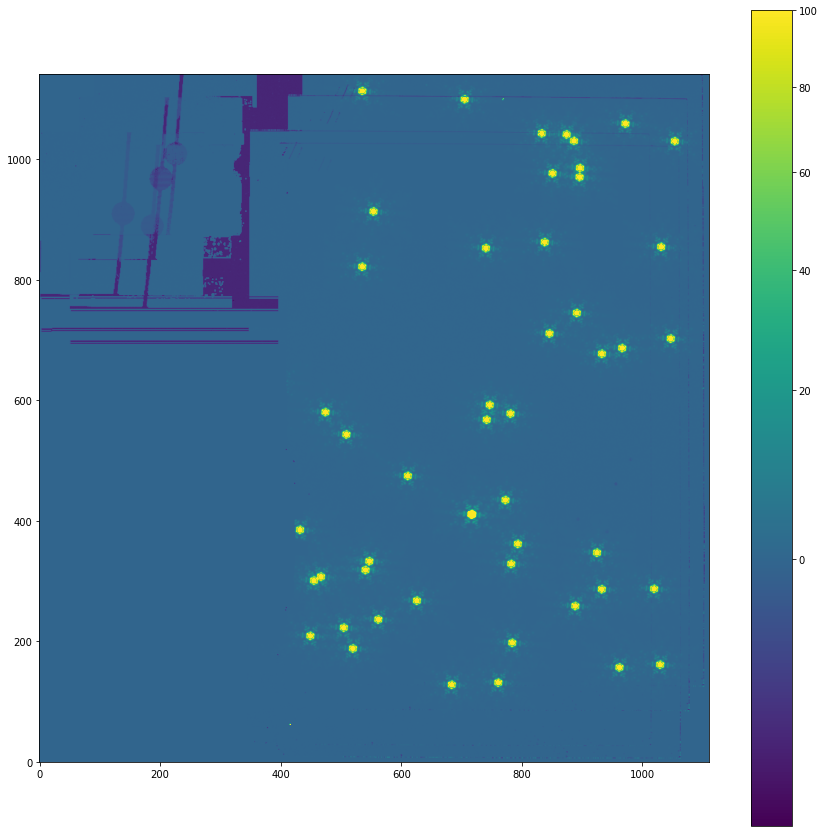

In [9]:
# read in ecsv photom file
from astropy.visualization import LogStretch, PercentileInterval, ManualInterval
from astropy import table
from matplotlib.colors import LogNorm
from astropy.visualization import (MinMaxInterval, SqrtStretch,
                                   ImageNormalize)

viz1 = LogStretch()
viz2 = LogStretch() + ManualInterval(-12,100)
norm = ImageNormalize(im_i2d.data, interval=MinMaxInterval(),
                      stretch=SqrtStretch())

plt.figure(figsize=(15,15))
#plt.imshow(viz2(im_i2d.data),cmap='gray')
plt.imshow(im_i2d.data,origin='lower',norm=norm,vmin=-12, vmax=100)
plt.colorbar()

### Display combined image with catalog sources overlaid

In [10]:
photfile = 'image3_combined_cat.ecsv'
data = table.Table.read(photfile, format='ascii', comment='#')
print(len(data),' sources detected')

55  sources detected


2021-05-17 22:05:30,258 - stpipe - WARNING - <ipython-input-1-cce6411f04eb>:15: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(im_i2d.data,origin='lower',norm=norm,vmin=-12, vmax=100)



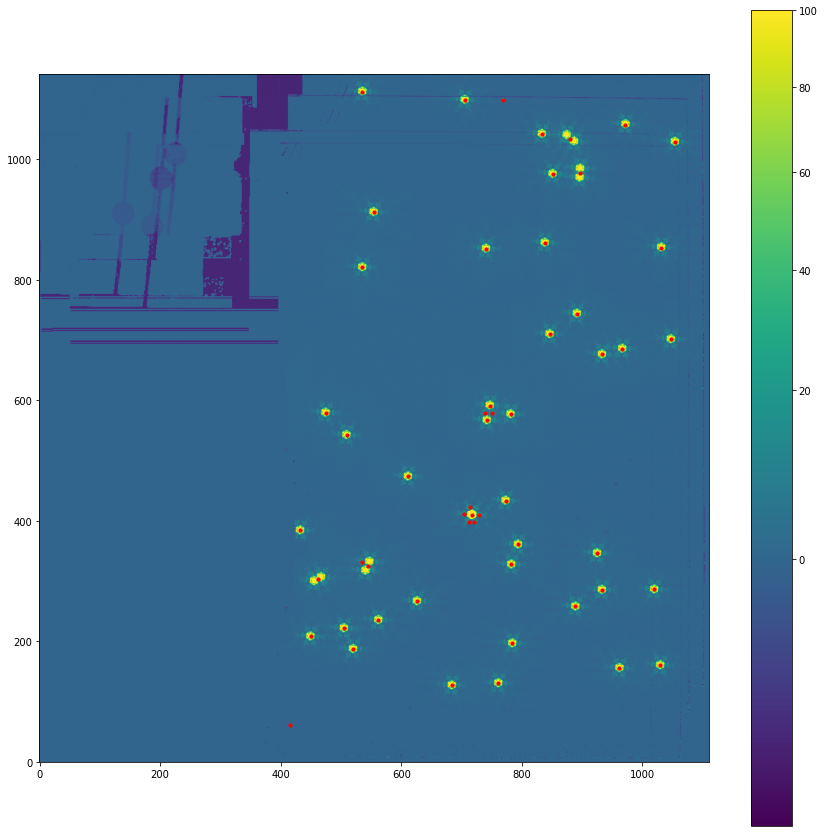

In [11]:
# read in ecsv photom file
from astropy.visualization import LogStretch, PercentileInterval, ManualInterval
from astropy import table
from matplotlib.colors import LogNorm
from astropy.visualization import (MinMaxInterval, SqrtStretch,
                                   ImageNormalize)

viz1 = LogStretch()
viz2 = LogStretch() + ManualInterval(-12,100)
norm = ImageNormalize(im_i2d.data, interval=MinMaxInterval(),
                      stretch=SqrtStretch())

plt.figure(figsize=(15,15))
#plt.imshow(viz2(im_i2d.data),cmap='gray')
plt.imshow(im_i2d.data,origin='lower',norm=norm,vmin=-12, vmax=100)
plt.colorbar()
plt.scatter(data['xcentroid'], data['ycentroid'],lw=1, s=10,color='red')